In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
visible_size = 2
hidden_size = 4
seed = 44  # Seed for random number generator
walker_steps = 1000
grad_steps = 100


In [29]:
np.random.seed(seed)

gamma = utils.random_gamma(visible_size)
ih = IsingHamiltonian(gamma=gamma)
ihr = IsingHamiltonianReduced(gamma=gamma[:len(gamma)])


In [30]:
eig,_ = np.linalg.eigh(ih)
I_truth = np.min(eig)
print(f"E_truth: {I_truth}")


E_truth: -0.7506147172558728


In [31]:
ising_reduced_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ihr, walker_steps=walker_steps)
ir_energy_list = [it for it in ising_reduced_rbm.train(iter=grad_steps, lr=0.01)]

Current ground state: -0.08920855336965808 for training step 0
Current ground state: -0.20586472793185026 for training step 1
Current ground state: -0.11053065890480851 for training step 2
Current ground state: -0.08108047846979119 for training step 3
Current ground state: -0.1154916447215864 for training step 4
Current ground state: -0.14997268955537954 for training step 5
Current ground state: -0.07317393156527217 for training step 6
Current ground state: -0.16897257164584206 for training step 7
Current ground state: -0.27730199442415177 for training step 8
Current ground state: -0.21765116444813182 for training step 9
Current ground state: -0.29686422835585563 for training step 10
Current ground state: -0.09150763312162961 for training step 11
Current ground state: -0.33826979488221015 for training step 12
Current ground state: -0.2110604825960831 for training step 13
Current ground state: -0.13100497818478812 for training step 14
Current ground state: -0.16156830439004174 for train

In [32]:
ising_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ih, walker_steps=walker_steps)
i_energy_list = [it for it in ising_rbm.train(iter=grad_steps, lr=0.01)]

Current ground state: -0.13054883931446093 for training step 0
Current ground state: -0.1233572382936554 for training step 1
Current ground state: -0.12279338836462737 for training step 2
Current ground state: -0.12332060246245087 for training step 3
Current ground state: -0.19400411692880304 for training step 4
Current ground state: -0.1648615022589734 for training step 5
Current ground state: -0.2093687904025836 for training step 6
Current ground state: -0.15750977054219994 for training step 7
Current ground state: -0.18659848627763415 for training step 8
Current ground state: -0.1913957372207577 for training step 9
Current ground state: -0.21003768330164196 for training step 10
Current ground state: -0.19678031291204126 for training step 11
Current ground state: -0.33053392210799265 for training step 12
Current ground state: -0.2570048836148573 for training step 13
Current ground state: -0.32062956656873126 for training step 14
Current ground state: -0.29975728457605805 for training

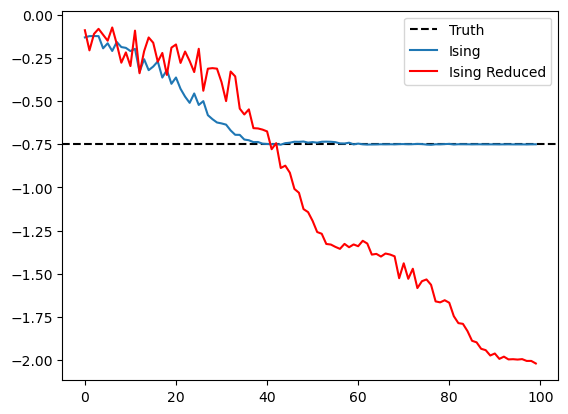

In [33]:
plt.axhline(y=I_truth, color='k', linestyle='--')
plt.plot(i_energy_list)
plt.plot(ir_energy_list, 'r')

plt.legend(['Truth', 'Ising', 'Ising Reduced'])

plt.show()